In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

%matploblib notebook

Using TensorFlow backend.
ERROR:root:Line magic function `%matploblib` not found.


# Simplest possible autoencoder

$$
\mathbf h = f(\mathbf x) = relu(W_1 \mathbf x + b)
$$

$$
\mathbf r = g(\mathbf x) = \sigma(W_2 \mathbf h + b)
$$

$$
J = L(\mathbf x, \mathbf r)
$$

In [2]:
# Define the model

encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [3]:
# Preprocess the data

(images_train, _), (images_test, _) = mnist.load_data()
images_train = images_train.astype('float32') / 255
x_train = images_train.reshape((len(images_train), np.prod(images_train.shape[1:])))

images_test = images_test.astype('float32') / 255
x_test = images_test.reshape((len(images_test), np.prod(images_test.shape[1:])))

print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [4]:
# Train the model
autoencoder.fit(
    x_train, x_train, 
    epochs=50, 
    batch_size=256, 
    shuffle=True, 
    validation_data=(x_test, x_test)
)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s - loss: 0.3731 - val_loss: 0.2728
Epoch 2/50
60000/60000 [==============================] - 1s - loss: 0.2662 - val_loss: 0.2567
Epoch 3/50
60000/60000 [==============================] - 1s - loss: 0.2474 - val_loss: 0.2361
Epoch 4/50
60000/60000 [==============================] - 1s - loss: 0.2276 - val_loss: 0.2170
Epoch 5/50
60000/60000 [==============================] - 1s - loss: 0.2106 - val_loss: 0.2022
Epoch 6/50
60000/60000 [==============================] - 1s - loss: 0.1980 - val_loss: 0.1914
Epoch 7/50
60000/60000 [==============================] - 1s - loss: 0.1884 - val_loss: 0.1829
Epoch 8/50
60000/60000 [==============================] - 1s - loss: 0.1807 - val_loss: 0.1759
Epoch 9/50
60000/60000 [==============================] - 1s - loss: 0.1743 - val_loss: 0.1700
Epoch 10/50
60000/60000 [==============================] - 1s - loss: 0.1689 - val_loss: 0.1650

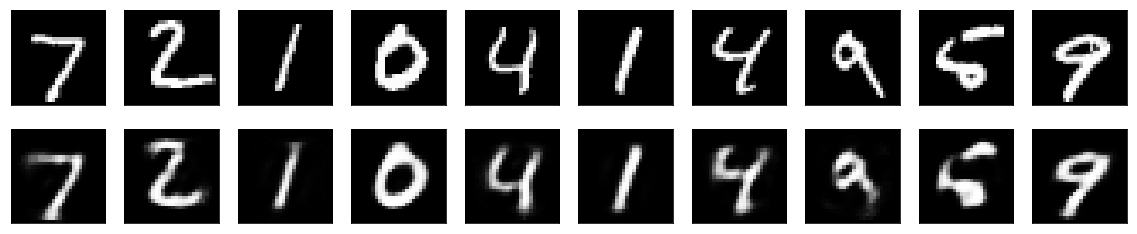

In [5]:
# Visualize the model

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()